In [100]:
#imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


## Read in truck 1 csv and select important columns for analysis. Use pandas parameters for possible speed boost.  


In [101]:
df_T1 = pd.read_csv(r'../data/trucks/truck1.csv', index_col = "Time", usecols = ['Time','1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch2_BattOut_100A',
 '4649_Ch3_Trailer_50A',
 '4649_Ch4_Inverter_100A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch7_200A_BatterySeparator',
 '4649_Ch8_APU_BatteryVoltage',
 'AmbientAirTemperature_V',
 'EngineAirIntakeTemp_BB1_X_E',
 'EngineSpeed',
 'VehicleSpeed',
 'WheelBasedVehicleSpeed',
 'GPS altitude',] ,engine = 'c', skip_blank_lines = True)


#### convert time col to datetime and view head of file, enough to view actual values.

In [102]:
df_T1.index = pd.to_datetime(df_T1.index)
print(df_T1.index)

DatetimeIndex(['2019-08-07 07:54:02.959000', '2019-08-07 07:54:03.059000',
               '2019-08-07 07:54:03.159000', '2019-08-07 07:54:03.259000',
               '2019-08-07 07:54:03.359000', '2019-08-07 07:54:03.459000',
               '2019-08-07 07:54:03.559000', '2019-08-07 07:54:03.659000',
               '2019-08-07 07:54:03.759000', '2019-08-07 07:54:03.859000',
               ...
               '2019-08-05 15:12:52.621000', '2019-08-05 15:12:52.721000',
               '2019-08-05 15:12:52.821000', '2019-08-05 15:12:52.921000',
               '2019-08-05 15:12:53.021000', '2019-08-05 15:12:53.121000',
               '2019-08-05 15:12:53.221000', '2019-08-05 15:12:53.321000',
               '2019-08-05 15:12:53.421000', '2019-08-05 15:12:53.521000'],
              dtype='datetime64[ns]', name='Time', length=1216689, freq=None)


In [103]:
list(df_T1.head())

['1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch2_BattOut_100A',
 '4649_Ch3_Trailer_50A',
 '4649_Ch4_Inverter_100A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch7_200A_BatterySeparator',
 '4649_Ch8_APU_BatteryVoltage',
 'AmbientAirTemperature_V',
 'EngineAirIntakeTemp_BB1_X_E',
 'EngineSpeed',
 'VehicleSpeed',
 'WheelBasedVehicleSpeed',
 'GPS altitude']

### describe the selected data

In [282]:
df_T1.info()
df_T1.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1216689 entries, 2019-08-07 07:54:02.959000 to 2019-08-05 15:12:53.521000
Data columns (total 16 columns):
1730_CH9_ AutomaticStartStop      892538 non-null float64
1730_CH10_Truck_Batteries         1216198 non-null float64
4649_Ch1_Alternator_250A          1216197 non-null float64
4649_Ch2_BattOut_100A             1216197 non-null float64
4649_Ch3_Trailer_50A              1216197 non-null float64
4649_Ch4_Inverter_100A            1216197 non-null float64
4649_Ch5_Fridge_50A               1216197 non-null float64
4649_Ch6_200A_APU_BatteryBank     1216197 non-null float64
4649_Ch7_200A_BatterySeparator    1216197 non-null float64
4649_Ch8_APU_BatteryVoltage       1216197 non-null float64
AmbientAirTemperature_V           1216637 non-null float64
EngineAirIntakeTemp_BB1_X_E       1216639 non-null float64
EngineSpeed                       1216645 non-null float64
VehicleSpeed                      1216645 non-null float64
WheelBasedVehic

,1730_CH9_ AutomaticStartStop,1730_CH10_Truck_Batteries,4649_Ch1_Alternator_250A,4649_Ch2_BattOut_100A,4649_Ch3_Trailer_50A,4649_Ch4_Inverter_100A,4649_Ch5_Fridge_50A,4649_Ch6_200A_APU_BatteryBank,4649_Ch7_200A_BatterySeparator,4649_Ch8_APU_BatteryVoltage,AmbientAirTemperature_V,EngineAirIntakeTemp_BB1_X_E,EngineSpeed,VehicleSpeed,WheelBasedVehicleSpeed,GPS altitude
count,892538.000000,1.216198e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216637e+06,1.216639e+06,1.216645e+06,1.216645e+06,1.216645e+06,1.216573e+06
mean,0.008484,1.402766e+01,4.143630e+01,2.106691e+01,4.329782e-01,1.336951e+01,-2.104773e-02,-7.023623e-02,9.704267e-02,1.386995e+01,2.807985e+01,2.759628e+01,1.047636e+03,7.483319e+01,7.483316e+01,2.333260e+02
std,0.002597,5.379078e-02,3.111164e+01,4.769233e+00,4.261612e-01,1.643317e+01,5.838831e-02,4.943761e-02,5.352165e+00,2.840073e-01,2.934167e+00,2.966032e+00,1.828837e+02,3.195368e+01,3.195361e+01,4.166015e+01
min,0.000458,1.248569e+01,2.274548e+00,6.994354e+00,-7.343404e-02,-1.040265e+02,-4.396506e-01,-2.431907e-01,-3.952468e+01,1.214054e+01,1.759375e+01,1.700000e+01,4.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.007782,1.400092e+01,2.269303e+01,1.806859e+01,1.630808e-01,1.276608e+01,-7.152667e-02,-1.096742e-01,-4.234379e-01,1.380865e+01,2.606250e+01,2.600000e+01,1.040375e+03,6.732812e+01,6.732422e+01,1.982000e+02
50%,0.009155,1.404395e+01,2.715629e+01,2.039178e+01,1.840620e-01,1.591325e+01,-1.812009e-02,-8.106355e-02,-4.196231e-02,1.401144e+01,2.887500e+01,2.800000e+01,1.142125e+03,9.293750e+01,9.293750e+01,2.344000e+02
75%,0.010071,1.406134e+01,4.763199e+01,2.308881e+01,6.876097e-01,1.875525e+01,2.765698e-02,-4.291600e-02,1.792935e-01,1.404532e+01,3.025000e+01,3.000000e+01,1.146375e+03,9.312891e+01,9.312891e+01,2.636000e+02
max,0.255894,1.415427e+01,2.336585e+02,7.557603e+01,3.821431e+00,1.250000e+02,4.911498e-01,2.050431e-01,2.500000e+02,1.413001e+01,3.346875e+01,3.300000e+01,1.745375e+03,1.213672e+02,1.213672e+02,3.572000e+02


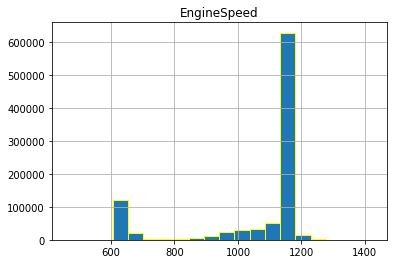

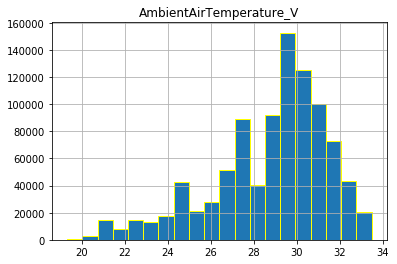

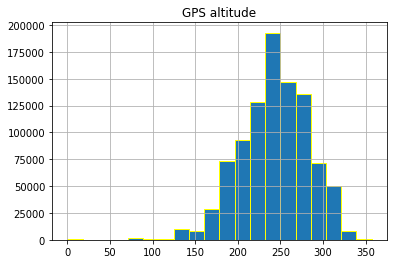

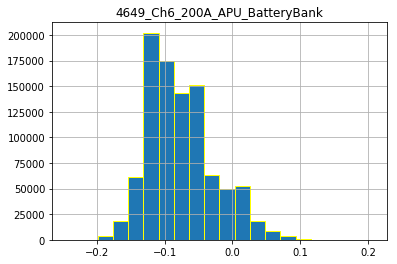

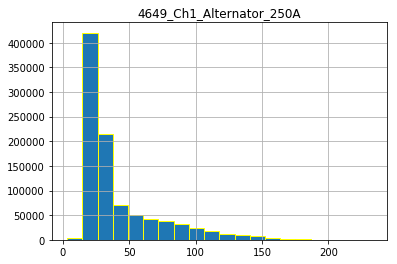

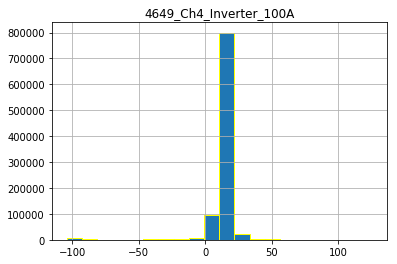

In [293]:
date3days = df_T1["2019-08-05":"2019-08-07"]
date3days = df_T1["2019-08-05":"2019-08-07"]
hist_3day1 = date3days[['EngineSpeed']].hist(ec = 'yellow', bins =20)
hist_3day2 = date3days[['AmbientAirTemperature_V']].hist(ec = 'yellow', bins =20)
hist_3day3 = date3days[['GPS altitude']].hist(ec = 'yellow', bins =20)
hist_3day4 = date3days[['4649_Ch6_200A_APU_BatteryBank']].hist(ec = 'yellow', bins =20)
hist_3day5 = date3days[['4649_Ch1_Alternator_250A']].hist(ec = 'yellow', bins =20)
hist_3day5 = date3days[['4649_Ch4_Inverter_100A']].hist(ec = 'yellow', bins =20)

# kd1 = date3days[['EngineSpeed']].plot.kde()
# kd2 = date3days[['AmbientAirTemperature_V']].plot.kde()
# kd3 = date3days[['GPS altitude']].plot.kde()
# kd4 = date3days[['4649_Ch6_200A_APU_BatteryBank']].plot.kde()
# kd5 = date3days[['4649_Ch1_Alternator_250A']].plot.kde()

Engine speed
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Inverter
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


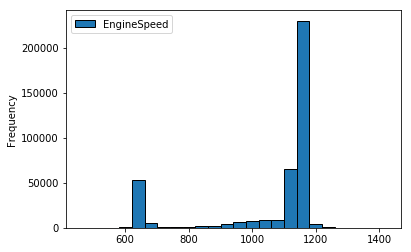

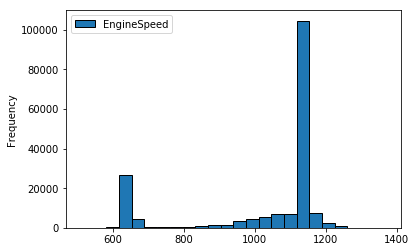

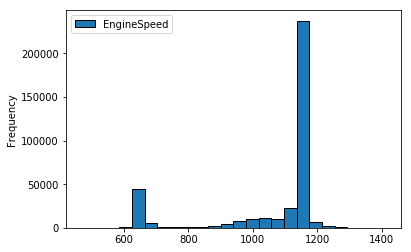

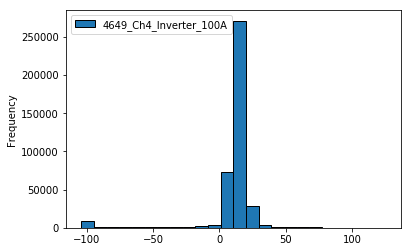

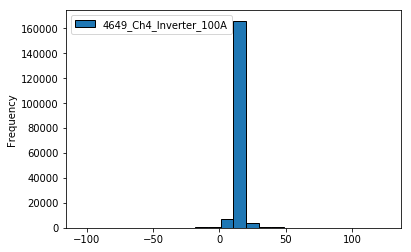

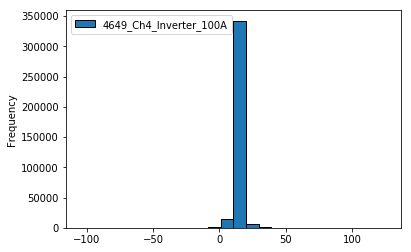

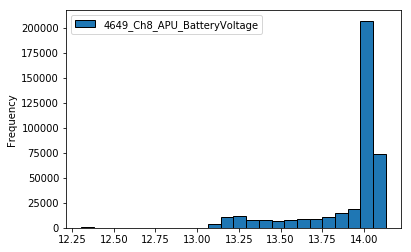

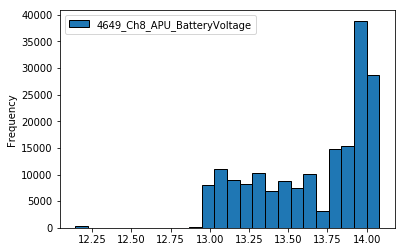

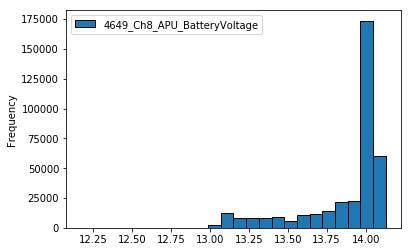

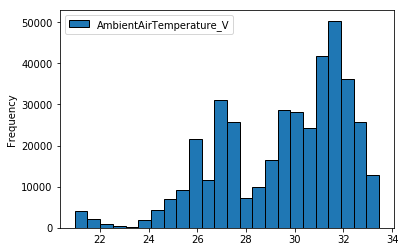

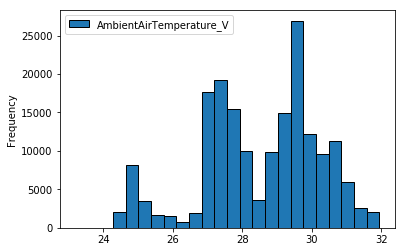

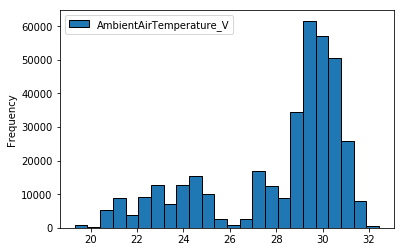

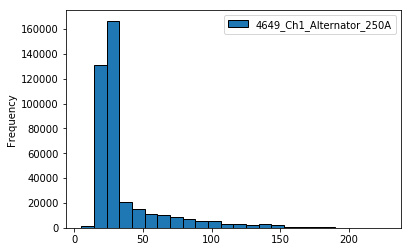

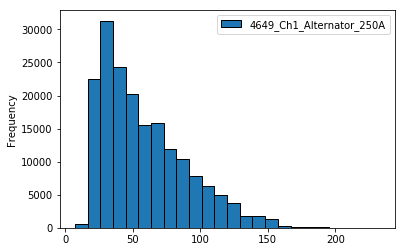

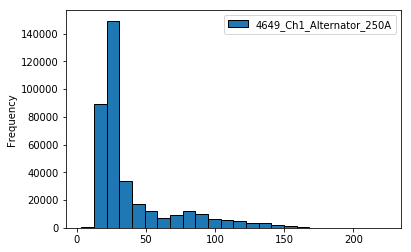

In [295]:
#daily data from time index

date85 = NoNa_df["2019-08-05"]
date86 = NoNa_df["2019-08-06"]
date87 = NoNa_df["2019-08-07"]

#print(date85.plot.kde()) #dont do this lol

#battery voltage day 1 to 3
print("Engine speed")
print(date85[['EngineSpeed']].plot.hist(ec= 'black',bins=24))
print(date86[['EngineSpeed']].plot.hist(ec= 'black',bins=24))
print(date87[['EngineSpeed']].plot.hist(ec= 'black',bins=24))

print("Inverter")
print(date85[['4649_Ch4_Inverter_100A']].plot.hist(ec= 'black',bins=24))
print(date86[['4649_Ch4_Inverter_100A']].plot.hist(ec= 'black',bins=24))
print(date87[['4649_Ch4_Inverter_100A']].plot.hist(ec= 'black',bins=24))

#print(date85[['4649_Ch8_APU_BatteryVoltage']].plot.kde())
print(date85[['4649_Ch8_APU_BatteryVoltage']].plot.hist(ec= 'black',bins=24))
print(date86[['4649_Ch8_APU_BatteryVoltage']].plot.hist(ec= 'black',bins=24))
print(date87[['4649_Ch8_APU_BatteryVoltage']].plot.hist(ec= 'black',bins=24))

#ambient temperatures day 1 to 3
print(date85[['AmbientAirTemperature_V']].plot.hist(ec= 'black',bins=24))
print(date86[['AmbientAirTemperature_V']].plot.hist(ec= 'black',bins=24))
print(date87[['AmbientAirTemperature_V']].plot.hist(ec= 'black',bins=24))

#alternator 
print(date85[['4649_Ch1_Alternator_250A']].plot.hist(ec= 'black',bins=24))
print(date86[['4649_Ch1_Alternator_250A']].plot.hist(ec= 'black',bins=24))
print(date87[['4649_Ch1_Alternator_250A']].plot.hist(ec= 'black',bins=24))



# date85 =None
# date86 = None
# date87 = None

In [1]:
print("***August 5th***\n",date85[['4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V','4649_Ch1_Alternator_250A']].describe())
print("\n______________________________________________________________________\n")
print("***August 6th***\n",date86[['4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V','4649_Ch1_Alternator_250A']].describe())
print("\n______________________________________________________________________\n")
print("***August 7th***\n",date87[['4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V','4649_Ch1_Alternator_250A']].describe())

NameError: name 'date85' is not defined

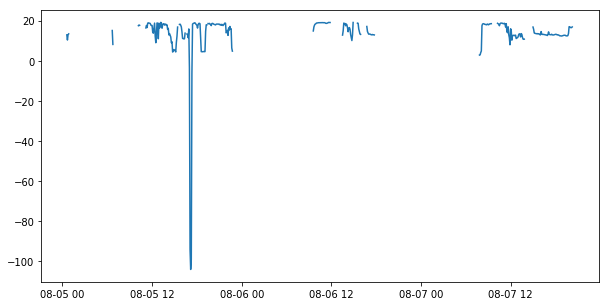

In [294]:
x1 = df_T1.dropna()
x1 = df_T1["2019-08-04":"2019-08-07"].resample("300S").mean()
x = x1.index
amTemp = x1['4649_Ch4_Inverter_100A']
altAmps = x1['4649_Ch1_Alternator_250A']
y = x1[ '4649_Ch8_APU_BatteryVoltage']
plt.figure(figsize=(10,5))
plt.plot(x,amTemp)



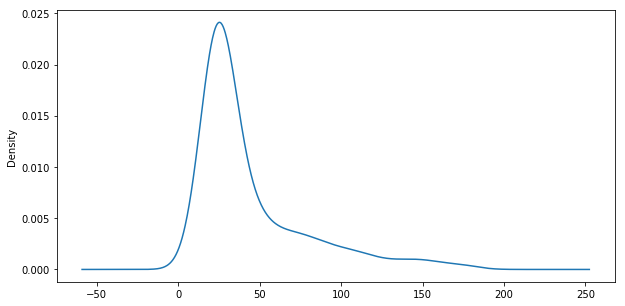

In [266]:
plt.figure(figsize=(10,5))
ax = altAmps.plot.kde()
